In [1]:
import pathlib
import sys
sys.path.insert(0, str(pathlib.Path.cwd().parent))

In [ ]:
import pandas as pd
# import numpy as np
# from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

In [3]:
in_csvfilename = '../data/notes_all.csv'
out_csvfilename = '../data/notes_all_pca.csv'

In [4]:
xdf = pd.read_csv(in_csvfilename)
xdf = xdf.dropna()

In [5]:
indexes = xdf['NOM'].values
xdf = xdf.drop(columns=['NOM'])
columns = xdf.columns.values
data  = xdf.values

In [6]:
def cpnvert_annee_to_int(annee):
    if annee == 'A2017':
        return 0
    elif annee == 'A2018':
        return 1
    elif annee == 'A2019':
        return 2
    elif annee == 'A2020':
        return 3
    else:
        return 4
df = pd.DataFrame(data, index=indexes, columns=columns)
labels_groups = df['ANNEE']
xdf = df.drop(columns=['ANNEE'])
varsnames = xdf.columns.values

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(xdf)
df['CATEGS'] = df['ANNEE'].apply(cpnvert_annee_to_int)
df['CONT'] = ((df['TP2'] + df['TP3'] + df['TP4'] + df['TP5'] + df['TP6'] + df['TP7']) / 6.0).round(1)

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
PC_scores = pd.DataFrame(principalComponents, columns=["PC1", "PC2"])
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=varsnames)
PC1 = pca.fit_transform(scaled_features)[:, 0]
PC2 = pca.fit_transform(scaled_features)[:, 1]
df['PC1'] = PC1.round(3)
df['PC2']  = PC2.round(3)
ldngs = pca.components_
scalePC1 = 1.0 / (PC1.max() - PC1.min())
scalePC2 = 1.0 / (PC2.max() - PC2.min())

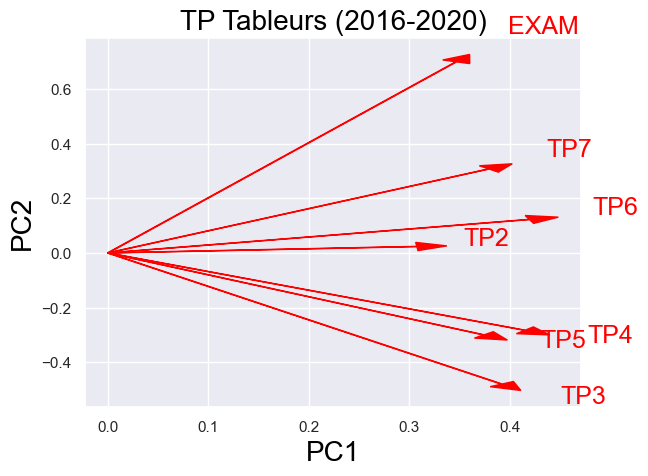

In [9]:
sns.set_theme()
fig, ax = plt.subplots()
for i, feature in enumerate(varsnames):
    ax.arrow(
        0, 0, ldngs[0, i], ldngs[1, i], head_width=0.03, head_length=0.03, color="red"
    )
    ax.text(ldngs[0, i] * 1.15, ldngs[1, i] * 1.15, feature, color="red", fontsize=18)
ax.set_xlabel("PC1", fontsize=20, color="black")
ax.set_ylabel("PC2", fontsize=20, color="black")
ax.set_title("TP Tableurs (2016-2020)", fontsize=20, color="black")
plt.show()

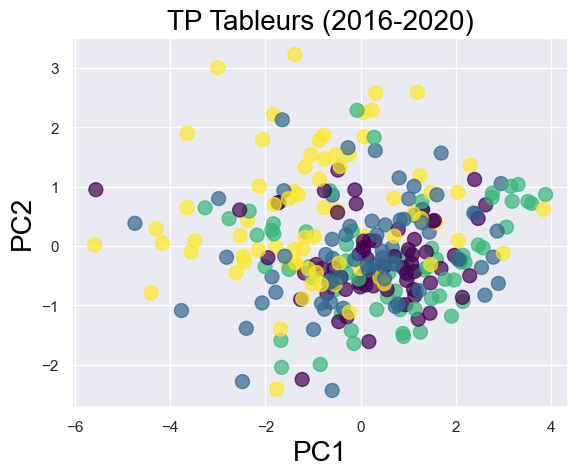

In [10]:
sns.set_theme()
fig, ax = plt.subplots()
scatter = ax.scatter(
    PC1, PC2, c=df['CATEGS'], cmap='viridis', s=100, alpha=0.7
)
ax.set_xlabel("PC1", fontsize=20, color="black")
ax.set_ylabel("PC2", fontsize=20, color="black")
ax.set_title("TP Tableurs (2016-2020)", fontsize=20, color="black")
plt.show()

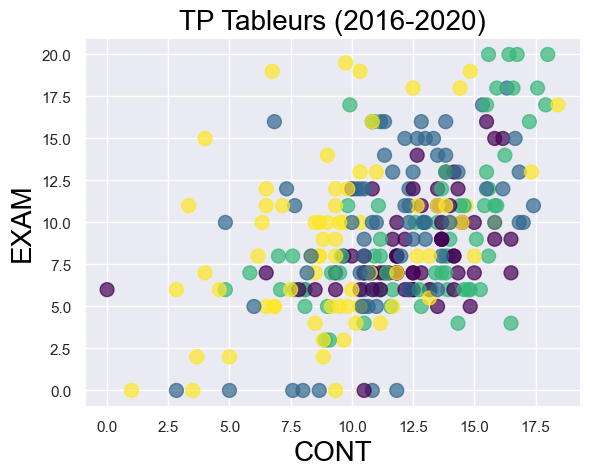

In [11]:
sns.set_theme()
fig, ax = plt.subplots()
scatter = ax.scatter(
    df['CONT'], df['EXAM'], c=df['CATEGS'], cmap='viridis', s=100, alpha=0.7
)
ax.set_xlabel("CONT", fontsize=20, color="black")
ax.set_ylabel("EXAM", fontsize=20, color="black")
ax.set_title("TP Tableurs (2016-2020)", fontsize=20, color="black")
plt.show()